# Transmission spectra: full

## Setup

In [1]:
%load_ext autoreload
%autoreload 2

In [30]:
import glob as glob
import matplotlib as mpl
import matplotlib.patheffects as PathEffects
import matplotlib.pyplot as plt
import matplotlib.transforms as transforms
import numpy as np
import pandas as pd
import seaborn as sns

import corner
import json
import pathlib
import pickle
import utils
import warnings

from astropy import constants as const
from astropy import units as uni
from astropy.io import ascii, fits
from astropy.time import Time
from mpl_toolkits.axes_grid1 import ImageGrid

# Default figure dimensions
FIG_WIDE = (11, 5)
FIG_LARGE = (8, 11)

# Figure style
sns.set(style="ticks", palette="colorblind", color_codes=True, context="talk")
params = utils.plot_params()
plt.rcParams.update(params)

## [Dowload data](https://www.dropbox.com/sh/ngr81uubrouo8nk/AACrisaNEnLdxDwwosdX1Edva?dl=1)

Unzip this into a folder named `data` in the same level as this notebook

## Finish set-up

In [3]:
# Link dirs
! ln -srf data/detrended_binned_lcs data/tspec_full

## Load

In [23]:
base_dir = "data/tspec_full/out_l/WASP50"

nights = {
    "Transit 1": "131219",
    "Transit 2": "150927",
    "Transit 3": "161211",
}

data_dict = {
    transit: {
        "tspec": pd.read_csv(
            f"{base_dir}/w50_{ut_date}/transpec.csv"
        )[["Wav_d", "Wav_u", "Depth (ppm)", "Depthup (ppm)", "DepthDown (ppm)"]],
        
        "results": pd.read_table(
            f"{base_dir}/w50_{ut_date}/white-light/results.dat",
            sep = "\s+",
            comment = '#',
            index_col = "Variable",
        ),
    }
   for (transit, ut_date) in nights.items()
}

## Plot

offsets: [ 270.46807185  -38.20928716 -285.21887117]
offsets (% mean wlc depth): [ 1.42145711 -0.20081063 -1.4989806 ]
Mean depth unc (ppm): 301.75350068850076
Median depth unc (ppm) 305.18883507252684

Saving tspecs to: data/tspec_full/out_l/WASP50/tspecs.csv
mean WLC depth: 19027.522467749634 192.2914616569606
Rp (Rj): 1.54635127749767 jupiterRad
Rs (Rsun): 1.152 solRad
gp (m/s^2): 1990.2171356740673 cm / s2


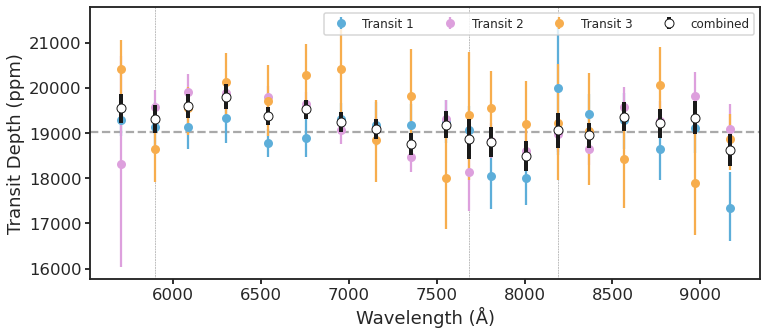

In [31]:
fig, ax = plt.subplots(figsize=FIG_WIDE)

utils.plot_tspec_IMACS(ax, base_dir, data_dict)

# Save
fig.tight_layout()
fig.set_size_inches(FIG_WIDE)
#utils.savefig(f"../paper/figures/tspec_full/tspec_full.pdf")
#utils.savefig("/home/mango/Desktop/tspecs.png", dpi=250)

## Table

In [20]:
tspecs = pd.read_csv(f"{base_dir}/tspecs.csv", comment='#')
tspecs#.to_clipboard(index=False)

,Wavelength (Å),Transit 1,Transit 2,Transit 3,Combined
0,5600.0 - 5800.0,19300^{+400}_{-400},18300^{+2400}_{-2300},20400^{+600}_{-700},19546 \pm 317
1,5800.0 - 5985.8,19100^{+500}_{-600},19600^{+400}_{-400},18700^{+700}_{-700},19306 \pm 303
2,5985.8 - 6185.8,19100^{+500}_{-500},19900^{+400}_{-400},19600^{+500}_{-600},19595 \pm 273
3,6185.0 - 6420.0,19300^{+600}_{-500},19900^{+300}_{-400},20100^{+600}_{-700},19806 \pm 273
4,6420.0 - 6655.0,18800^{+300}_{-300},19800^{+200}_{-300},19700^{+800}_{-800},19381 \pm 203
5,6655.0 - 6855.0,18900^{+500}_{-400},19600^{+300}_{-300},20300^{+700}_{-800},19521 \pm 220
6,6855.0 - 7055.0,19300^{+300}_{-300},19100^{+300}_{-300},20400^{+1000}_{-1000},19242 \pm 218
7,7055.0 - 7255.0,19200^{+500}_{-500},19100^{+300}_{-300},18800^{+900}_{-900},19093 \pm 227
8,7255.0 - 7455.0,19200^{+500}_{-500},18500^{+300}_{-300},19800^{+1100}_{-1000},18759 \pm 249
9,7455.0 - 7655.0,19300^{+500}_{-500},19300^{+400}_{-400},18000^{+1100}_{-1100},19185 \pm 305
